# Imports

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/ProgettoNAPDE/ProgettoNAPDE

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/ProgettoNAPDE/ProgettoNAPDE


In [2]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2024-10-18 05:44:10--  https://fem-on-colab.github.io/releases/firedrake-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4581 (4.5K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.47K  --.-KB/s    in 0s      

2024-10-18 05:44:11 (72.7 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4581/4581]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/13b09a2/rele

/usr/local/lib/python3.10/dist-packages/pytools/persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


In [3]:
%cd ../../../PyGeM
%ls

/gdrive/My Drive/PyGeM
build/             dist/         LICENSE.rst      readme/    test.py
CITATION.cff       dockerfiles/  pygem/           README.md  tests/
code_formatter.sh  docs/         pygem.egg-info/  setup.py   tutorials/


In [4]:
!python3.10 setup.py install
import pygem

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [5]:
%cd ../Colab Notebooks/ProgettoNAPDE/ProgettoNAPDE
%ls

/gdrive/My Drive/Colab Notebooks/ProgettoNAPDE/ProgettoNAPDE
 gmshcommands.txt   output/  'Progetto Napde.ipynb'   testairfoil.geo   testairfoil.msh


In [6]:
from firedrake import *
import matplotlib.pyplot as plt

# Mesh Plots

In [ ]:
import meshio
import matplotlib.pyplot as plt

In [ ]:
mesh = meshio.read(
    'testairfoil.msh'
)

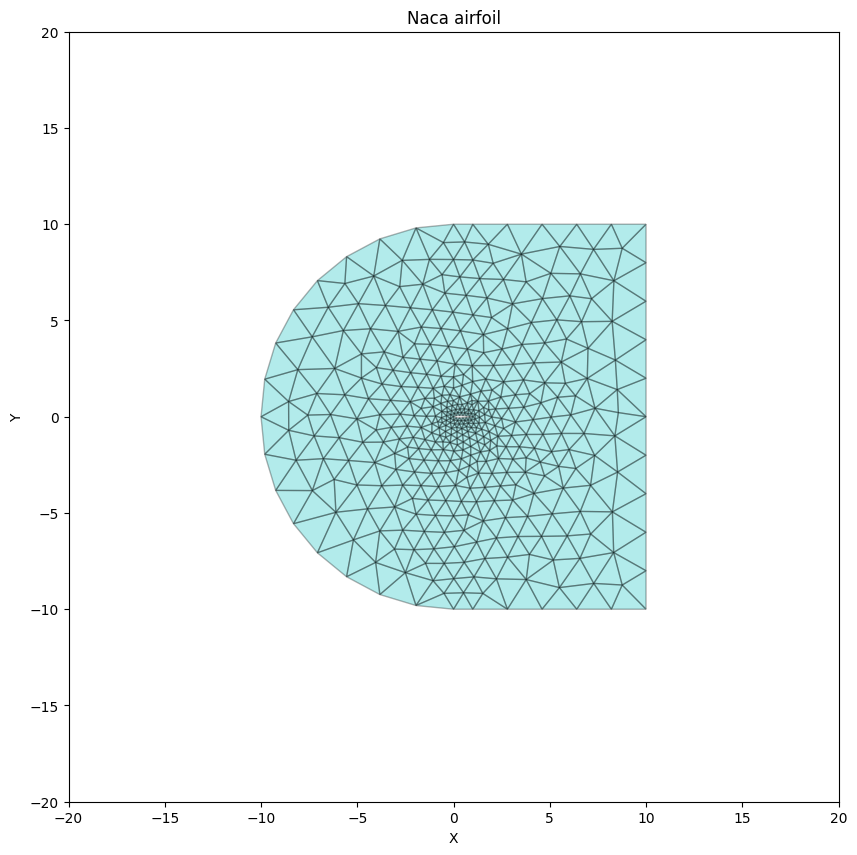

In [ ]:
# Extract points and cells
points = mesh.points
cells = mesh.cells_dict

# Extract triangle faces (if available)
triangles = cells.get('triangle', [])

# Create a figure with a larger size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the mesh
if len(triangles) > 0:
    # Unpacking triangle vertex indices
    triangle_vertices = points[triangles]
    for triangle in triangle_vertices:
        polygon = plt.Polygon(triangle[:, :2], edgecolor='k', facecolor='c', alpha=0.3)
        ax.add_patch(polygon)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Naca airfoil')
ax.set_aspect('equal')

# Set axis limits if needed to zoom into the area of interest
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

# Show the plot
plt.show()


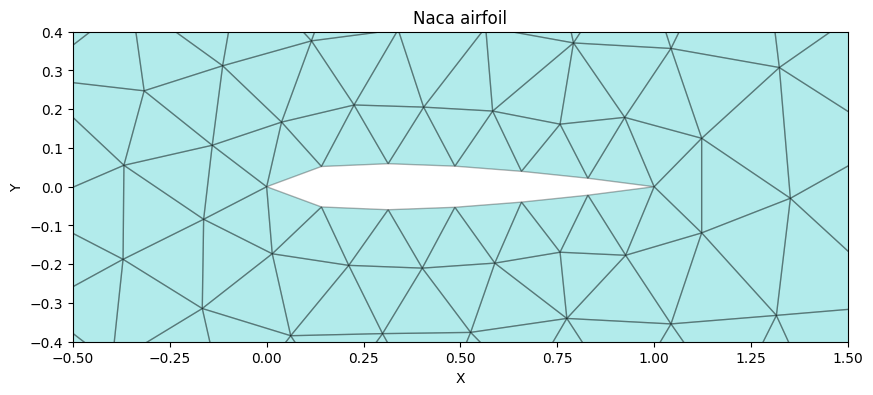

In [ ]:

# Extract points and cells
points = mesh.points
cells = mesh.cells_dict

# Extract triangle faces (if available)
triangles = cells.get('triangle', [])

# Create a figure with a larger size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the mesh
if len(triangles) > 0:
    # Unpacking triangle vertex indices
    triangle_vertices = points[triangles]
    for triangle in triangle_vertices:
        polygon = plt.Polygon(triangle[:, :2], edgecolor='k', facecolor='c', alpha=0.3)
        ax.add_patch(polygon)
    #ax.plot(points[:, 0], points[:, 1], '.', markersize=1)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Naca airfoil')
ax.set_aspect('equal')

# Set axis limits if needed to zoom into the area of interest
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.4, 0.4)

# Show the plot
plt.show()


# Import and plot the mesh

In [65]:
M = Mesh('testairfoil.msh')

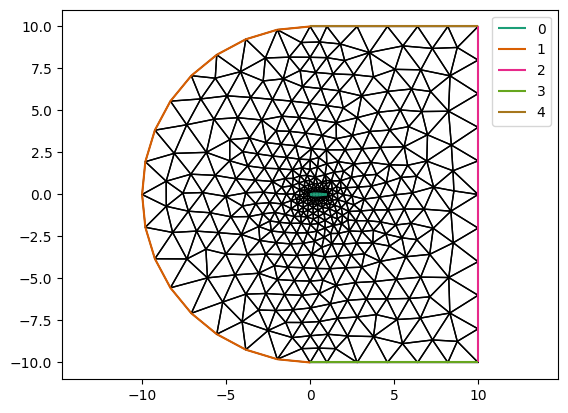

In [8]:
fig, ax = plt.subplots()
triplot(M, axes=ax)
ax.axis('equal')
ax.legend()

(-0.35, 0.35)

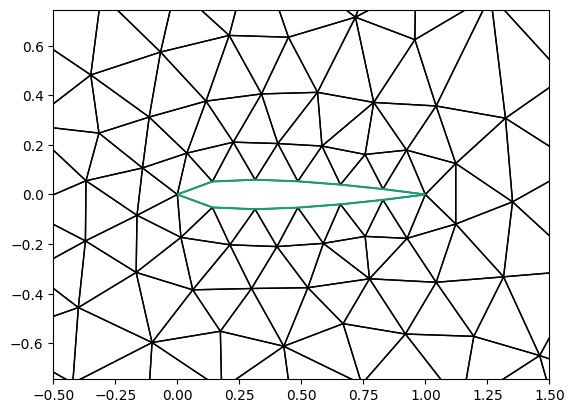

In [9]:
fig, ax = plt.subplots()
triplot(M, axes=ax)
ax.axis('equal')
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.35,0.35)

# Solve stokes to obtain a starting point

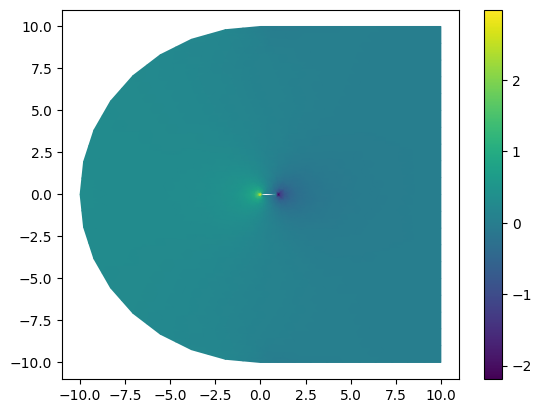

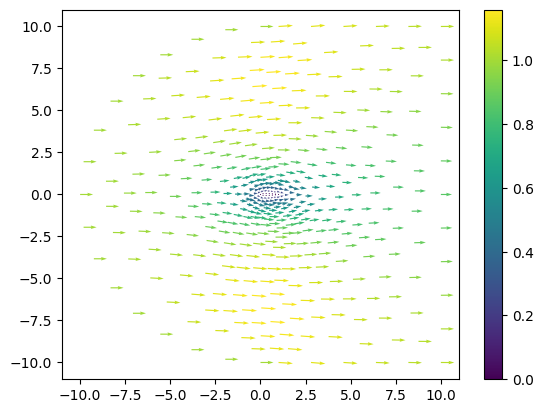

In [11]:
# function space
V=VectorFunctionSpace(M, 'P', 2) # velocity
Q=FunctionSpace(M, 'P', 1) # pressure
W=MixedFunctionSpace([V, Q])

# trial and test functions
u, p=TrialFunctions(W)
v, q=TestFunctions(W)

# data
x=SpatialCoordinate(M)
Uinf=as_vector([1,0])

# problem
a=inner(grad(u), grad(v))*dx - p*div(v)*dx+ q*div(u)*dx
L=inner(Constant((0,0)),v)*dx

# Dirichlet BC
bc1=DirichletBC(W.sub(0), as_vector([0,0]), 0)
bc2=DirichletBC(W.sub(0), Uinf, 1)
bcs=(bc1, bc2)

#solution
w_stokes=Function(W)
solve(a==L, w_stokes, bcs=bcs)
# u_h, p_h=split(wh) no split command works only for trial and test funtion
u_stokes, p_stokes=w_stokes.subfunctions

fig, ax = plt.subplots()
q=tripcolor(p_stokes, axes=ax)
fig.colorbar(q)
fig, ax = plt.subplots()
q=quiver(u_stokes, axes=ax)
fig.colorbar(q)

# Set Reynolds Number


In [12]:
Re = Constant(3500)

# Solve Navier Stokes with the initial guess

In [ ]:
# Adimensionalized formulation for high Re
def functional_high_Re(uh, v, ph, q, Re, f):
    G = inner(dot(grad(uh), uh), v) * dx  \
        +  1/Re * inner(grad(uh), grad(v)) * dx  \
        - div(v) * ph * dx  \
        + q * div(uh) * dx \
        - inner(f, v) * dx
    return G

# Adimensionalized formulation for low Re
def functional_low_Re(uh, v, ph, q, Re, f):
    G = Re * inner(dot(grad(uh), uh), v) * dx  \
        +  inner(grad(uh), grad(v)) * dx  \
        - div(v) * ph * dx  \
        + q * div(uh) * dx \
        - inner(f, v) * dx
    return G

In [ ]:
# Function spaces (mixed formulation)
V = VectorFunctionSpace(M, 'P', 2)
Q = FunctionSpace(M, 'P', 1)
W = MixedFunctionSpace([V, Q])

# Data and boundary conditions
f = Constant((0.,0.))

u_in = as_vector([1., 0.])

bc1 = DirichletBC(W.sub(0), Constant((0.,0.)), 0) # Dirichlet no-slip B.C. on the airfoil
bc2 = DirichletBC(W.sub(0), u_in, 1) # Dirichlet unitary B.C. on the inflow boundary

bcs = (bc1, bc2)

In [ ]:
# Trial and test functions
wh = Function(W)
uh, ph = split(wh) # trial functions
v, q = TestFunctions(W) # test functions
#w=Function(W)
#v, q=split(w)

# Setting the problem
G = functional_high_Re(uh, v, ph, q, Re, f)


In [ ]:
wh.assign(w_stokes)
param = {'ksp_type':'gmres',
         'ksp_pc_type':'mumps',
         'ksp_maxit':1000,
         'ksp_rtol':1e-8,
         'snes_rtol':1e-3,
         'snes_maxit':100,
       }
nsp = MixedVectorSpaceBasis(
    W, [W.sub(0), VectorSpaceBasis(constant=True)])

solve(G == 0, wh, bcs=bcs, solver_parameters=param)

firedrake:WARNING No comm specified for VectorSpaceBasis, COMM_WORLD assumed


## Plotting the solution

In [ ]:
uh, ph = wh.subfunctions
outfileU = File("output/velocity.pvd")
outfileP = File("output/pressure.pvd")
uh.rename("Velocity")   # this name will be used in Paraview
ph.rename("Pressure")   # this name will be used in Paraview
outfileU.write(uh)
outfileP.write(ph)


/usr/local/lib/python3.10/dist-packages/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


(-3.0, 3.0)

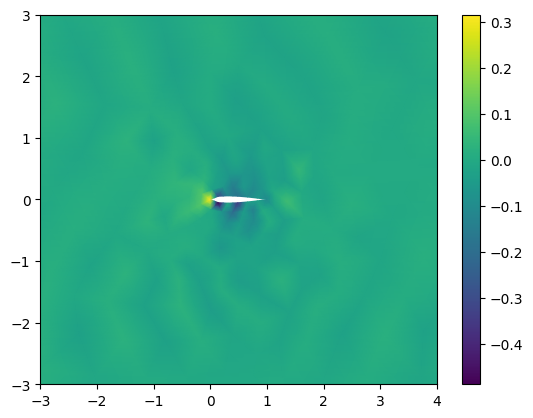

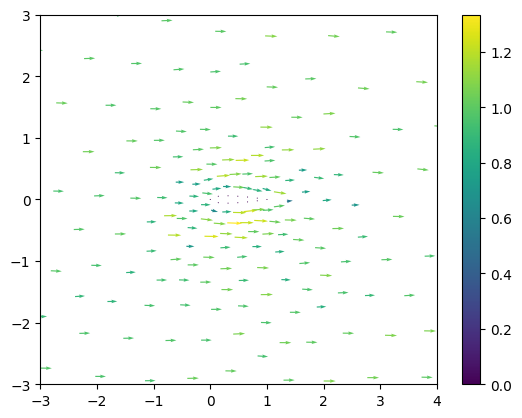

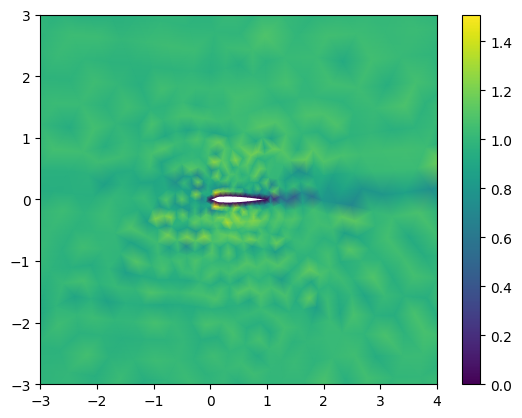

In [ ]:
u_h, p_h = wh.subfunctions
fig, ax = plt.subplots()
q=tripcolor(p_h, axes=ax)
fig.colorbar(q)
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 3)

fig, ax = plt.subplots()
q=quiver(u_h, axes=ax)
fig.colorbar(q)
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 3)

fig, ax = plt.subplots()
q=tripcolor(u_h, axes=ax)
fig.colorbar(q)
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 3)

# Solve Navier Stokes with SUPG Stabilization

In [13]:
def a(u,v, Re):
    return 1/Re*inner(grad(u), grad(v))*dx

def c(w,u,v):
    return inner(dot(grad(u), w),v)*dx

def b(v,q):
    return -q*div(v)*dx

def stabilization(u_old, u, p, v, q, M, Re):
    ubar = Function(FunctionSpace(M, 'DG', 0))
    ubar.project(sqrt(inner(u_old, u_old)))
    h = CellDiameter(M)
    Re_K = h * ubar * Re
    one  = Constant(1.0)
    delta=Constant(1.0)
    delta_K = delta * conditional(gt(Re_K, one),  h/(ubar+1e-5), h*h*Re)

    L= -1.0/Re*div(grad(u))+ dot(grad(u_old), u) + dot(grad(u), u_old)+ grad(p)
    Lss = dot(grad(u_old),v) + dot(grad(v),u_old) + grad(q)

    lhs= delta_K * inner(L, Lss)*dx + delta_K*div(u)*div(v)*dx
    rhs=delta_K*inner(dot(grad(u_old), u_old), Lss)*dx

    return lhs, rhs


In [14]:
# Function spaces (mixed formulation)
V = VectorFunctionSpace(M, 'P', 2)
Q = FunctionSpace(M, 'P', 1)
W = MixedFunctionSpace([V, Q])

# Data and boundary conditions
f = Constant((0.,0.))

u_in = as_vector([1., 0.])

bc1 = DirichletBC(W.sub(0), Constant((0.,0.)), 0) # Dirichlet no-slip B.C. on the airfoil
bc2 = DirichletBC(W.sub(0), u_in, 1) # Dirichlet unitary B.C. on the inflow boundary

bcs = (bc1, bc2)

In [15]:
# Trial and test functions
u, p = TrialFunctions(W) # trial functions
v, q = TestFunctions(W) # test functions

param = {'ksp_type':'gmres',
         'ksp_pc_type':'ilu',
         'ksp_maxit':1000,
         'ksp_rtol':1e-8,
         'snes_rtol':1e-3,
         'snes_maxit':100,
       }

# solution
wh = Function(W)
uh, ph = wh.subfunctions
wh.assign(w_stokes) #initialization with stokes solution

maxit=100
tol=1e-8
it=0
err=tol+1
delta=1

u_old = Function(V)
u_old.assign(uh)
p_old = Function(Q)
p_old.assign(ph)

while it < maxit and err > tol:
  lhs, rhs = stabilization(u_old, u, p, v, q, M, Re)
  G = a(u,v,Re) + c(u,u_old,v)+c(u_old,u,v)-b(u,q)+b(v,p)+lhs
  L = inner(f,v)*dx +rhs + c(u_old, u_old,v)
  pb = LinearVariationalProblem(G, L , wh, bcs=bcs)
  solver = LinearVariationalSolver(pb, solver_parameters=param)
  solver.solve()
  uh, ph = wh.subfunctions
  err = (errornorm(uh, u_old, 'H1') / norm(u_old, 'H1') + errornorm(ph, p_old, 'L2') / norm(p_old, 'L2'))
  u_old.assign(uh)
  p_old.assign(ph)
  it+=1

print(it)

16


## Plotting the solution

In [16]:
uh, ph = wh.subfunctions
outfileU = File("output/velocity.pvd")
outfileP = File("output/pressure.pvd")
uh.rename("Velocity")   # this name will be used in Paraview
ph.rename("Pressure")   # this name will be used in Paraview
outfileU.write(uh)
outfileP.write(ph)

/usr/local/lib/python3.10/dist-packages/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


(-3.0, 3.0)

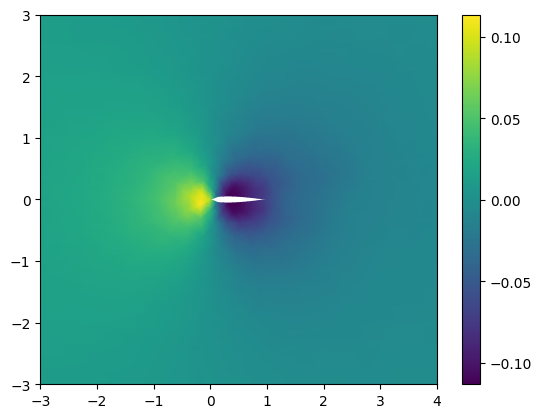

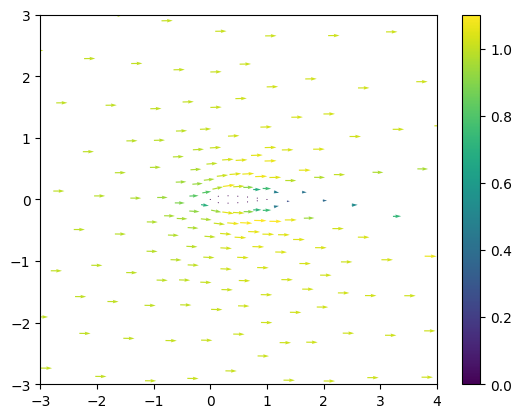

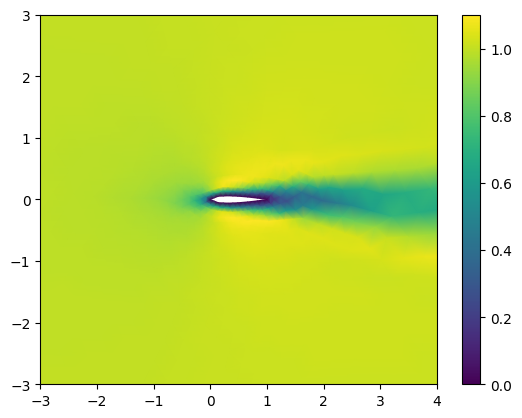

In [17]:
u_h, p_h = wh.subfunctions
fig, ax = plt.subplots()
q=tripcolor(p_h, axes=ax)
fig.colorbar(q)
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 3)

fig, ax = plt.subplots()
q=quiver(u_h, axes=ax)
fig.colorbar(q)
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 3)

fig, ax = plt.subplots()
q=tripcolor(u_h, axes=ax)
fig.colorbar(q)
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 3)

# Mesh deformation

## Extract boundary nodes from the current mesh

In [1]:
from pygem import FFD, RBF
import numpy as np
import matplotlib.pyplot as plt
import gmsh
import smithers as io

In [2]:
gmsh.initialize()

In [3]:
gmsh.open('testairfoil.msh')

Info    : Reading 'testairfoil.msh'...
Info    : 417 nodes
Info    : 834 elements
Info    : Done reading 'testairfoil.msh'


In [4]:
_, _, nodeTags = gmsh.model.mesh.getElements(dim = 1) #extract tags of the edges that bind physical edges
nodeTags = nodeTags[0]

coord = np.array([gmsh.model.mesh.getNode(tag)[0] for tag in nodeTags]) #extract nodes that make up the physical edges

#keep unique rows only

coord = np.unique(coord,axis = 0)

#check which matrix values are less than a prescribed quantity (far enough from the boundary)

mask = ((np.abs(coord)<5))

#take the rows that only contain true values (both x and y coordinates less than 5)

mask = np.logical_and(mask[:,1],mask[:,0])

#use mask to select airfoil coordinates...

obstacle = coord[mask,:]

#..and boundary coordinates

ext_boundary = coord[~mask,:]


In [5]:
gmsh.clear()
gmsh.finalize()

Info    : Clearing all models and views...
Info    : Done clearing all models and views


In [6]:
# prompt: estrai i tra 1 e shape pari

# Assuming you want to extract elements with indices between 1 and shape (which is likely the number of elements)
# and check if their index is even.


# Assuming you have a variable named 'elements' or similar that stores your elements
# Replace 'elements' with the actual variable name if it's different

for i in range(1, coord.shape[0]):  # Iterate from 1 to the number of elements
  if i % 2 == 0:  # Check if the index is even
      print(f"Element at index {i} is even and within the specified range")
      # Do something with the element, e.g., access it or modify it
      # You can access the element using its index in 'elements', e.g., elements[i]

Element at index 2 is even and within the specified range
Element at index 4 is even and within the specified range
Element at index 6 is even and within the specified range
Element at index 8 is even and within the specified range
Element at index 10 is even and within the specified range
Element at index 12 is even and within the specified range
Element at index 14 is even and within the specified range
Element at index 16 is even and within the specified range
Element at index 18 is even and within the specified range
Element at index 20 is even and within the specified range
Element at index 22 is even and within the specified range
Element at index 24 is even and within the specified range
Element at index 26 is even and within the specified range
Element at index 28 is even and within the specified range
Element at index 30 is even and within the specified range
Element at index 32 is even and within the specified range
Element at index 34 is even and within the specified range
E

(np.float64(-0.049999999999999996),
 np.float64(1.05),
 np.float64(-0.06536877039857825),
 np.float64(0.06536877039176694))

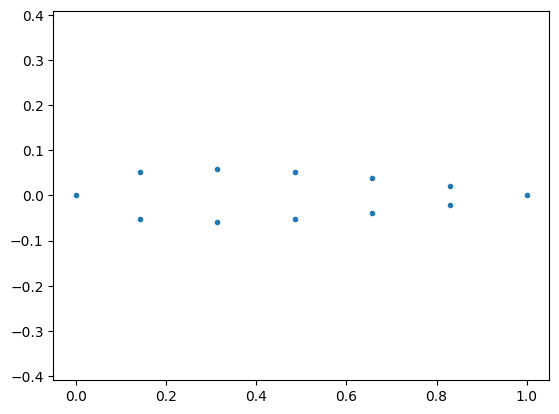

In [7]:
plt.plot(obstacle[:,0], obstacle[:,1], '.')
plt.axis('equal')

(np.float64(-11.0), np.float64(11.0), np.float64(-11.0), np.float64(11.0))

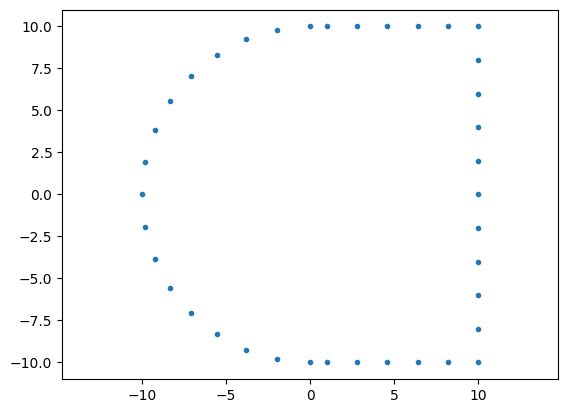

In [8]:
plt.plot(ext_boundary[:,0], ext_boundary[:,1], '.')
plt.axis('equal')


## Airfoil deformation

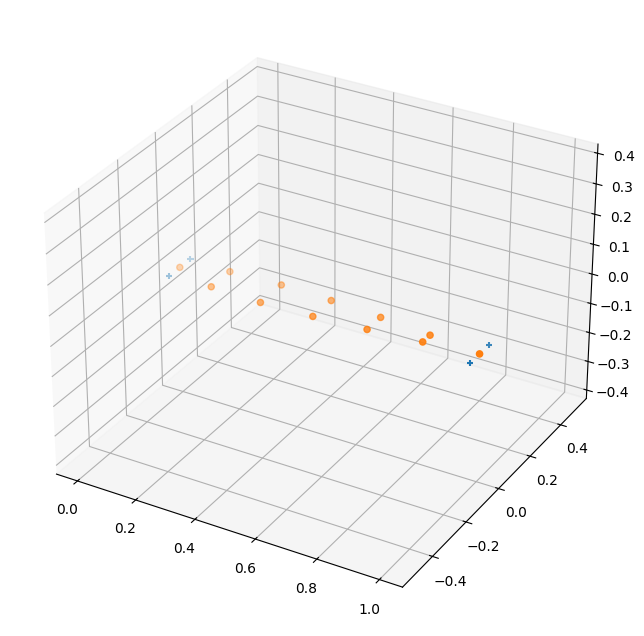

In [39]:
control_point_size = obstacle.shape[0]

ffd = FFD([2,2,1]) #initialize free-form deformation object with the dimensions of the matrix of control points

#define bounding box in which object to deform is contained (position of control points)

ffd.box_origin = np.array([min(obstacle[:,0]),min(obstacle[:,1]),0.]) #origin of bounding box (lower left corner of bounding box)
ffd.box_length = np.array([max(obstacle[:,0]),2*max(obstacle[:,1]),5.]) #size of bounding box


ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(*ffd.control_points().T,marker='+')
ax.scatter(obstacle[:,0],obstacle[:,1],obstacle[:,2])
ax.axis('equal')

#define movement in each direction for each control point

ffd.array_mu_y[1,1,0] = 1

#ffd.array_mu_y[1,1,0] = 0.3




(np.float64(-0.07291666666666674),
 np.float64(1.0729166666666667),
 np.float64(-0.5134905117721813),
 np.float64(0.6323428215611522),
 np.float64(-0.42968750000000006),
 np.float64(0.42968750000000006))

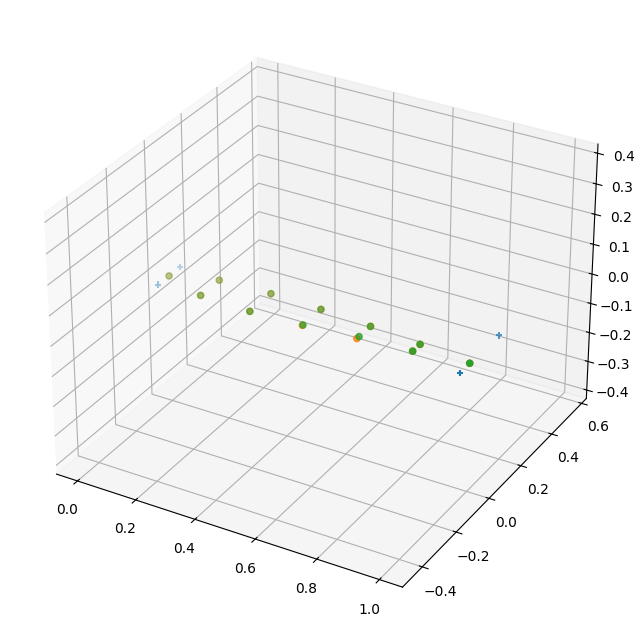

In [33]:
new_obstacle = ffd(obstacle)

ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(*ffd.control_points().T,marker='+')
ax.scatter(obstacle[:,0],obstacle[:,1],obstacle[:,2])
ax.scatter(new_obstacle[:,0],new_obstacle[:,1],new_obstacle[:,2])
ax.axis('equal')

## Deformation propagation

In [111]:
undeformed_points = np.zeros((50, 3))
deformed_points = np.zeros((50, 3))
undeformed_points_full = np.vstack([ext_boundary, obstacle])
deformed_points_full= np.vstack([ext_boundary, new_obstacle])

undeformed_points[:,:], uindexes = np.unique(undeformed_points_full, return_index=True, axis=0)
deformed_points[:,:]   = deformed_points_full[uindexes]


rbf=RBF()
rbf = RBF(original_control_points=undeformed_points, deformed_control_points=deformed_points, radius=3)

LinAlgError: Singular matrix

In [79]:
D3_coord=np.ones((coord.shape[0], 3))
D3_coord[:,:2]=coord
new_coord=rbf(D3_coord)

(np.float64(-11.000000095367431),
 np.float64(11.000002002716064),
 np.float64(-11.000000143051148),
 np.float64(11.000003004074097))

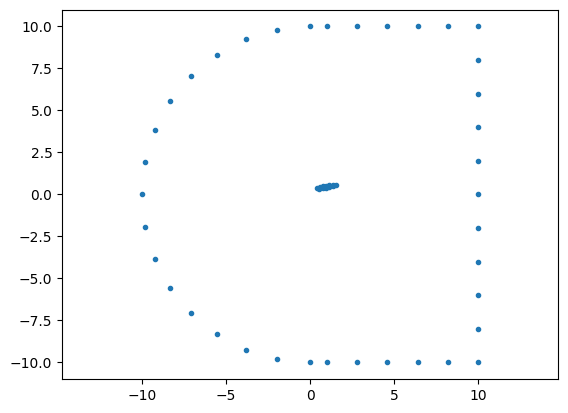

In [80]:
plt.plot(new_coord[:,0], new_coord[:,1], '.')
plt.axis('equal')

In [81]:
import numpy as np
from firedrake import Mesh, Function

# Step 1: Assume you already have an existing mesh (initial_mesh)
initial_mesh = M # Replace with your mesh file

# Step 2: Get the coordinate function of the original mesh
mesh_coords = initial_mesh.coordinates

# Step 3: Create a Function with the same FunctionSpace as the coordinates
new_coords_func = Function(mesh_coords.function_space())

# Step 4: Assume `new_coords` is a NumPy array of shape (num_vertices, 2) or (num_vertices, 3)
# containing the deformed coordinates.
new_coords = new_coord[:,:2]
# Step 5: Assign the new coordinates to the Function
# Note: You need to ensure that the shape of `new_coords` matches the shape of `mesh_coords.dat.data`.
new_coords_func.dat.data[:] = new_coords

# Step 6: Update the mesh with the new coordinates
initial_mesh.coordinates.assign(new_coords_func)


ValueError: could not broadcast input array from shape (50,2) into shape (417,2)

NameError: name 'triplot' is not defined

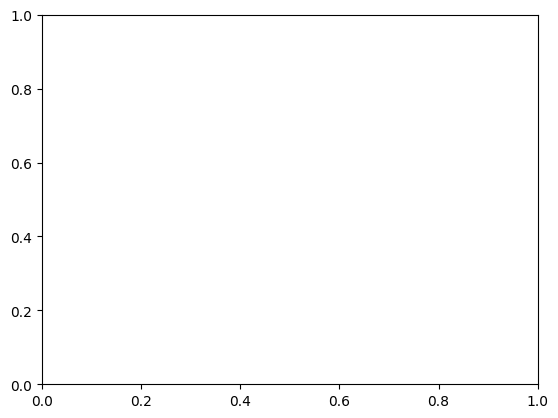

In [69]:
fig, ax = plt.subplots()
triplot(initial_mesh, axes=ax)
ax.axis('equal')
